In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail/Online Retail.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df= pd.read_excel("/kaggle/input/online-retail/Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df = df.dropna()

In [6]:
df.shape

(406829, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [10]:
# Import necessary libraries
import pandas as pd
import datetime as dt

# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define the churn period (in days)
churn_period = 90

# Calculate the date range for the analysis
end_date = df['InvoiceDate'].max()
start_date = end_date - dt.timedelta(days=churn_period)

# Aggregate data to a daily level
daily_sales = df.groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq='D')])['Quantity'].sum().reset_index()

# Identify customers who have not made a purchase in the churn period
churned_customers = daily_sales[daily_sales['InvoiceDate'] <= start_date].groupby('CustomerID').size().reset_index(name='counts')
churned_customers = churned_customers[churned_customers['counts'] > 0]['CustomerID'].tolist()

# Add a churn column to the original dataframe
df['Churn'] = df['CustomerID'].apply(lambda x: 'Churned' if x in churned_customers else 'Not churned')

# Print the dataframe with the new churn column
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country    Churn  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Churned  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Churned  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Churned  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Churned  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Churned  


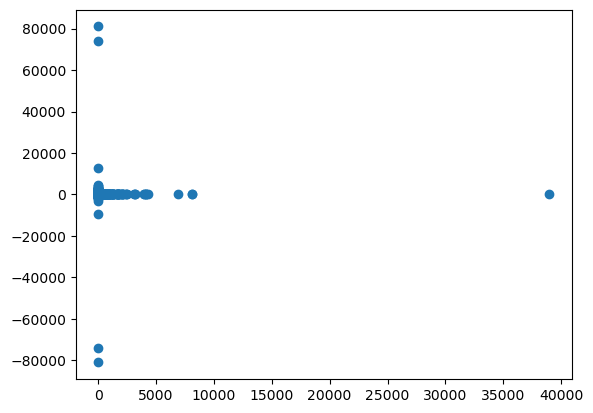

In [11]:
plt.scatter(df['UnitPrice'], df['Quantity'])

In [12]:
# applying KMeans clustering
from sklearn.cluster import KMeans

data1 = list(zip(df['UnitPrice'], df['Quantity']))
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    sse.append(kmeans.inertia_)

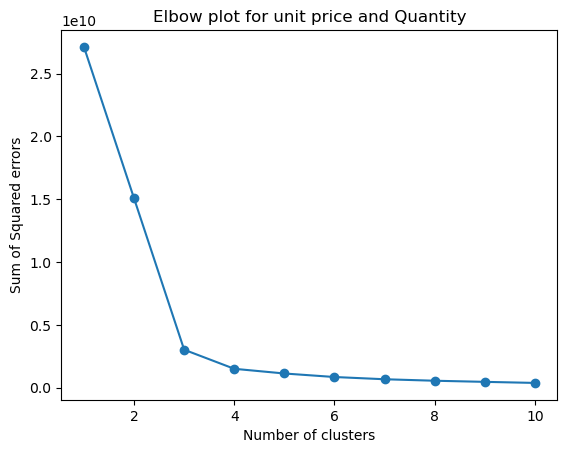

In [13]:
# Elbow plot to find no. of clusters 
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow plot for unit price and Quantity')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared errors')
plt.show()

In [14]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [15]:
kmeans = KMeans(n_clusters=4)
y_predicted = kmeans.fit_predict(df[['UnitPrice','Quantity']])
df['cluster']=y_predicted
df['cluster'].unique()

array([0, 2, 1, 3], dtype=int32)

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Churn,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churned,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churned,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Churned,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Churned,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Churned,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Churned,0


Text(0, 0.5, 'Quantity')

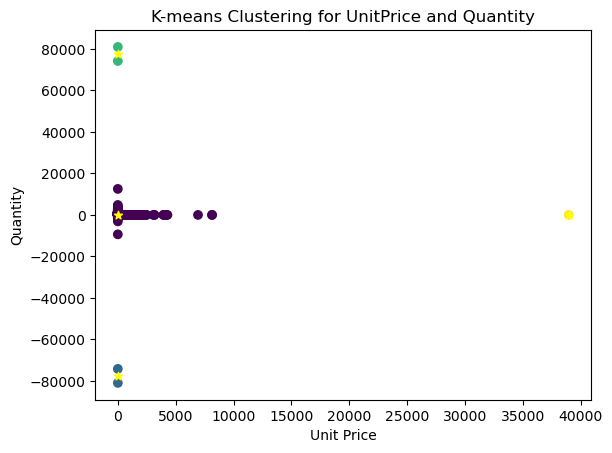

In [17]:
# finding different cluster center
kmeans.cluster_centers_

plt.scatter(df['UnitPrice'], df['Quantity'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.title('K-means Clustering for UnitPrice and Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')

In [18]:
def Find_cluster():
    u = float(input("Enter Unit price = "))
    Id = float(input("Enter Customer ID = "))
    cd = int(input("Enter Invoice code = "))
    q = int(input("Enter Quantity = "))
    s = int(input("Enter stock code= "))
    
    m=0
    for i in range(0,406829):
        if df['UnitPrice'].iloc[i]==u and df['CustomerID'].iloc[i]==Id and df['Invoice_code'].iloc[i] == cd and df['Quantity'].iloc[i] == q and df['Stock_Code'].iloc[i] == s:
            print('Entered data belongs to cluster',df['cluster'].iloc[i])
            m=i
    if m==0:
        print('Entered data does not belongs to any cluster.')
        
        
'''Remove # to run the following function'''
# Find_cluster()   

'Remove # to run the following function'

In [19]:
# Select relevant columns for clustering
data2 = df[['UnitPrice','Quantity','CustomerID']]

# Perform scaling on the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)

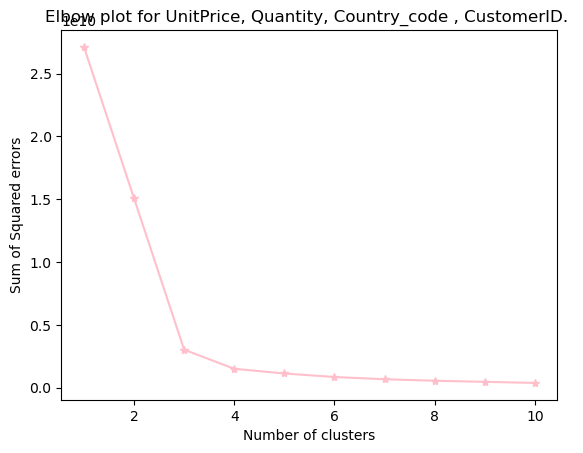

In [20]:
# applying KMeans clustering
sse2 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    sse2.append(kmeans.inertia_)
    
# Elbow plot to find no. of clusters 
plt.plot(range(1,11), sse, marker='*', color='pink')
plt.title('Elbow plot for UnitPrice, Quantity, Country_code , CustomerID. ' )
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared errors')
plt.show()

In [21]:
# Run K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_scaled)

# Add cluster labels to the dataframe
df['cluster_label'] = kmeans.labels_
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Churn,cluster,cluster_label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churned,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churned,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Churned,0,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Churned,0,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Churned,0,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Churned,0,1


Text(0.5, 0.92, 'K-means Clustering for UnitPrice, Quantity, CustomerID.')

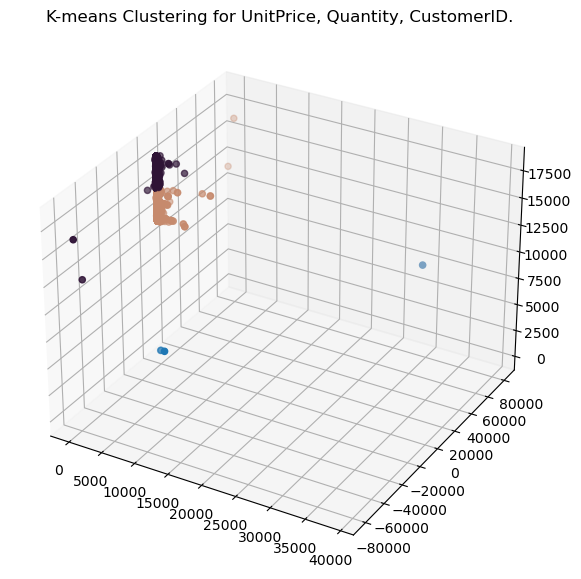

In [22]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['UnitPrice'], df['Quantity'], df['CustomerID'],c=kmeans.labels_, cmap='twilight_shifted_r')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.title('K-means Clustering for UnitPrice, Quantity, CustomerID.')

In [23]:
df = df.drop(['cluster','cluster_label'],axis=1)

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churned
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churned
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churned


In [25]:
# Calculate total amount spent per customer
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
total_amount_per_customer = df.groupby('CustomerID')['TotalAmount'].sum()

# Calculate number of orders per customer
num_orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate average order value per customer
avg_order_value_per_customer = df.groupby('CustomerID')['TotalAmount'].mean()

# Calculate time since last order per customer
last_order_date = df['InvoiceDate'].max()
time_since_last_order = (last_order_date - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

In [26]:
customer_data = pd.concat([total_amount_per_customer, num_orders_per_customer, 
                           avg_order_value_per_customer, time_since_last_order], axis=1)
customer_data.columns = ['TotalAmount', 'NumOrders', 'AvgOrderValue', 'TimeSinceLastOrder']
customer_data = (customer_data - customer_data.mean()) / customer_data.std()

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(customer_data)
customer_data['Cluster'] = kmeans.labels_

In [28]:
customer_data

,TotalAmount,NumOrders,AvgOrderValue,TimeSinceLastOrder,Cluster
CustomerID,,,,,
12346.0,-0.230975,-0.329324,-0.226501,2.321757,2
12347.0,0.293398,0.206079,-0.040508,-0.893631,0
12348.0,-0.012315,-0.115163,0.228837,-0.169176,0
12349.0,-0.017144,-0.436405,-0.037408,-0.724922,0
12350.0,-0.190290,-0.436405,-0.072009,2.162973,2
...,...,...,...,...,...
18280.0,-0.209002,-0.436405,-0.084658,1.845403,2
18281.0,-0.221142,-0.436405,-0.135821,0.882772,2
18282.0,-0.209489,-0.222244,-0.119808,-0.834087,0


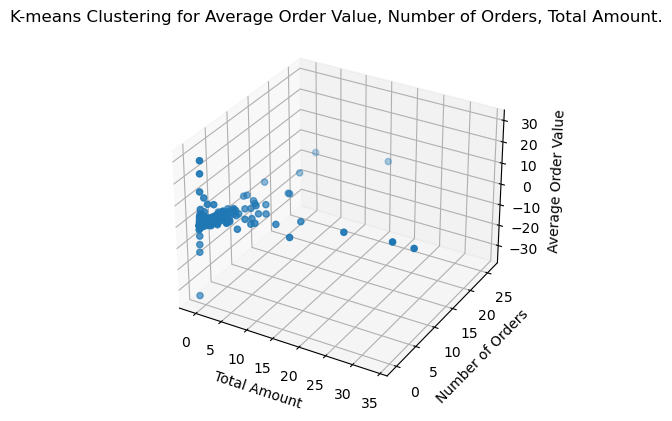

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot of TotalAmount, NumOrders, and AvgOrderValue
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data['TotalAmount'], customer_data['NumOrders'], customer_data['AvgOrderValue'])
ax.set_xlabel('Total Amount')
ax.set_ylabel('Number of Orders')
ax.set_zlabel('Average Order Value')
plt.title('K-means Clustering for Average Order Value, Number of Orders, Total Amount.')
plt.show()

This table appears to show the results of customer segmentation using clustering. The columns represent various customer behavior metrics, including TotalAmount, NumOrders, AvgOrderValue, and TimeSinceLastOrder. The Cluster column appears to indicate which cluster each customer has been assigned to based on their behavior.

It's difficult to draw specific conclusions from this table without more context about the clustering methodology and the goals of the analysis. However, some general observations might include:

Cluster 1 appears to represent customers with relatively low TotalAmount, NumOrders, and AvgOrderValue, but who have made a purchase relatively recently. These customers may represent a segment of infrequent buyers who are nonetheless still engaged with the business.

Cluster 2 appears to represent customers with a wide range of TotalAmount, NumOrders, and AvgOrderValue, but who have not made a purchase recently. These customers may represent a segment of lapsed buyers who could be targeted with re-engagement campaigns.

Cluster 3 appears to represent customers with relatively high TotalAmount, NumOrders, and AvgOrderValue, who have made a purchase recently. These customers may represent a segment of high-value, loyal customers who could be targeted with retention campaigns or cross-sell/up-sell opportunities.